## Exploration of the UCoMP Lyot fitler tunings.

Results displayed in the last cell.  Input wavelength in the cell above that.

In [8]:
import numpy as np
import matplotlib.pylab as plt

In [9]:
def gaussian(x, amplitude=1.0, center=1074.7, sigma=1.0, expon=2.0):
    ...
    return (amplitude/(np.sqrt(2*np.pi)*sigma))* np.exp(-abs(x-center)**expon / (2*sigma**expon))

def superGaus(x, a, b, alpha):
    y = np.log((np.cosh(2*alpha*np.pi*a)+np.cosh(2*alpha*np.pi*x))/(np.cosh(2*alpha*np.pi*b)+np.cosh(2*alpha*np.pi*x)))
    y = y/np.pi/alpha/6
    return(y)


In [10]:
def plotTunings(waveArray,badArray,cleanArray,filterFWHM,continumOffset,centerWave,contArray=None,description=""):
    tuneColors=["yellowgreen","limegreen","lightgreen","forestgreen","green","seagreen","darkgreen"]
    contColors=["gold","darkorange","bisque"]
    marker="o"

    numPts = 40
    pts = np.arange(numPts)/(numPts-1)*filterFWHM-filterFWHM/2
    markerSize = 1
    fig,axes = plt.subplots(ncols=2)
    fig.set_figwidth(14)
    #fig1, ax1 = plt.subplots()
    ax = axes[0]
    ax1 = axes[1]
    for i, tun in enumerate(waveArray):
        if i ==0:
            ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label="Lyot Tuning")
            ax.plot(tun+pts-continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker=">",ms=markerSize)
            ax.plot(tun+pts+continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="<",ms=markerSize)
            ax1.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label=str(tun))

        else:
            ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize)
            ax.plot(tun+pts-continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker=">",ms=markerSize)
            ax.plot(tun+pts+continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="<",ms=markerSize)
            ax1.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label=str(tun))
    if contArray is not None:
        for i, tun in enumerate(contArray):
                ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker="o",ms=markerSize,label="Clean")
                ax.plot(tun+pts-continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker=">",ms=markerSize)
                ax.plot(tun+pts+continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker="<",ms=markerSize)


    badYVal = 1.005


    for i, bad in enumerate(badArray):
        if i ==0:
            ax.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",label="Bad",ms=4)
            ax1.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",label="Bad",ms=4)
        else:
            ax.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",ms=4)
            ax1.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",ms=4)

    lineWidth = 4

    for i, cleanRegion in enumerate(cleanArray):
        if i ==0:
            ax.plot(cleanRegion,np.array([badYVal,badYVal]),"tab:orange",linewidth=lineWidth,label="Clean region")
        else:
            ax.plot(cleanRegion,np.array([badYVal,badYVal]),"tab:orange",linewidth=lineWidth)
    ax1.set_title(description +" central region")

    ax.set_title(description)
    ax.set_ylabel("Arbitrary/relative transmission units")
    ax.set_xlabel("Wavelength (nm)")
    
    x = np.arange(1000)/200-2.5
    ax.plot(x+centerWave,superGaus(x,2,1,1.5)*1.8+.5,label="Prefilter")
    ax.legend(bbox_to_anchor =(0.5,-0.3), loc='lower center',ncol=3)
    ax1.legend(bbox_to_anchor =(0.5,-0.3), loc='lower center',ncol=3)
    #ax.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    #ax1.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)

In [14]:
# Input wavelengths from github and Alin's comments

#2021 5 wavelength tuning for UCoMP 1074
old1074 = np.array([1074.48, 1074.59, 1074.70,1074.81, 1074.92])
#Proposed Narrow tuning wavelngth based on adding a tuning position between
#the 2022 3 wavelength Scans
narrow1074 = np.array([1074.58 ,1074.64,1074.70,1074.76,1074.82])
#Absorbtion regions reported by Alin
bad1074 =np.array([1074.46,1074.93,1074.63])
#Clean background regions reported by Alin
clean1074 = [[1074.21,1074.31],[1075.14,1075.26]]
#Likely clean continum location based on Alin's reporting
continumLocation1074 =  np.array([1074.26,1075.19])

fwhm1074 = .138
continummPos1074 = 1.256
centeralWave1074 = 1074.7


#2021 5 wavelength tuning for UCoMP 1079
old1079 =np.array([1079.58,1079.69,1079.80,1079.91,1080.02])
#Proposed Narrow tuning wavelngth based on adding a tuning position between
#the 2022 3 wavelength Scans
narrow1079 = np.array([1079.68,1079.74,1079.80,1079.86,1079.92])

#Absorbtion regions reported by Alin
bad1079 =np.array([1079.61,1079.95])
#Clean background regions reported by Alin
clean1079 = [[1079.33,1079.44],[1080.01,1080.09]]
#Likely clean continum location based on Alin's reporting
continumLocation1079 =  np.array([1079.40,1080.05])

fwhm1079 = .141
continummPos1079 = 1.280
centeralWave1079 = 1079.8



### Prefilter shape is approximate based on a visual review of the filter accecptance data from Andor.



1074
1079


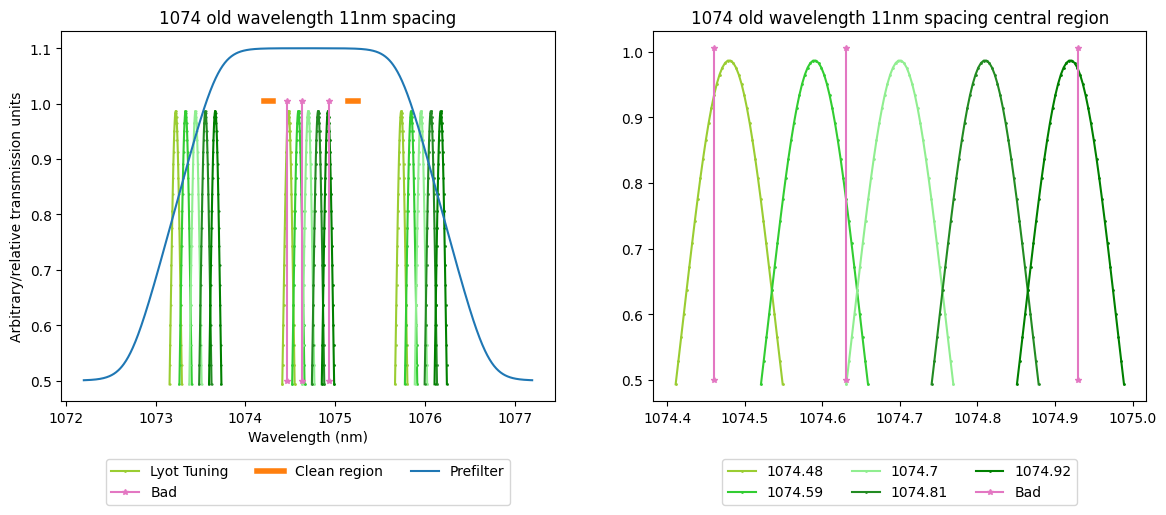

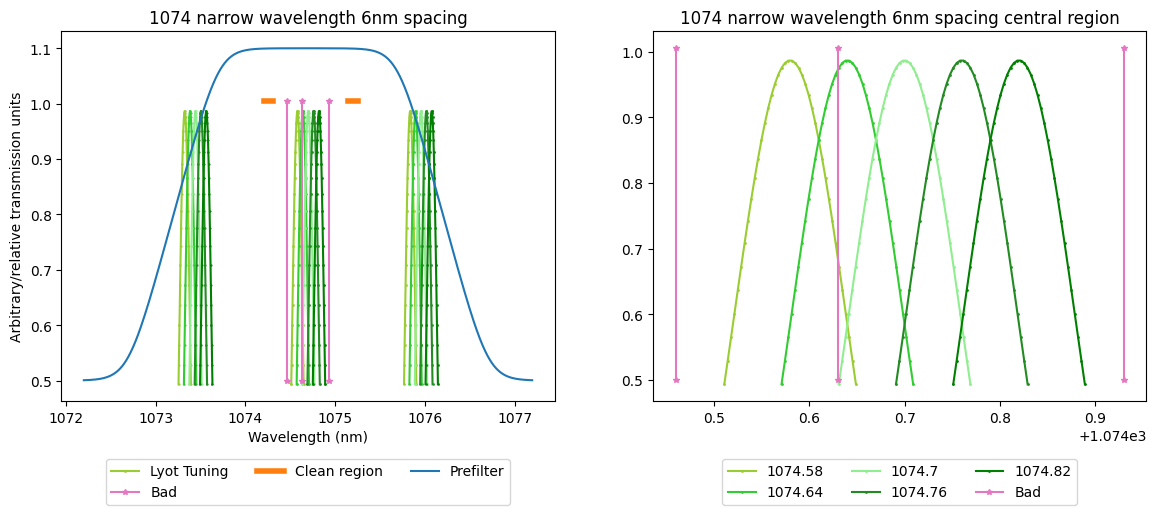

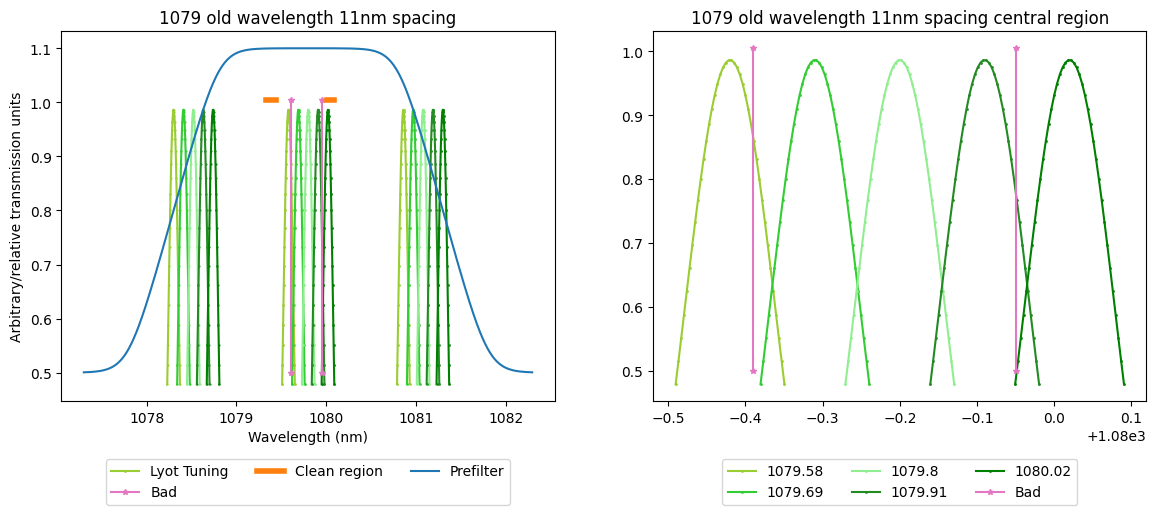

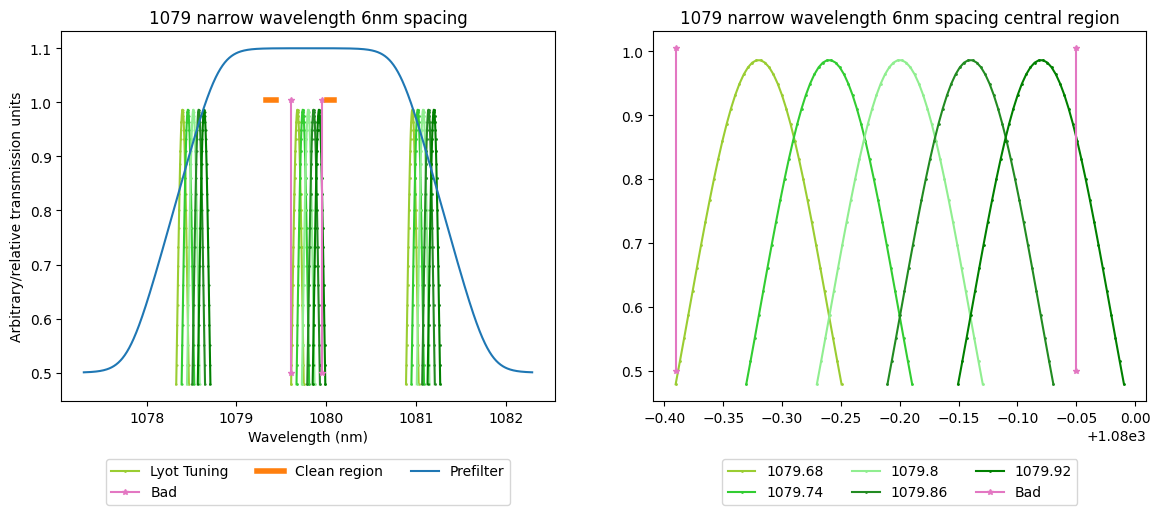

In [20]:
print("1074")

plotTunings(old1074,bad1074,clean1074,fwhm1074,continummPos1074,centeralWave1074,contArray=None,description="1074 old wavelength 11nm spacing")
plotTunings(narrow1074,bad1074,clean1074,fwhm1074,continummPos1074,centeralWave1074,contArray=None,description="1074 narrow wavelength 6nm spacing")

print("1079")

plotTunings(old1079,bad1079,clean1079,fwhm1079,continummPos1079,centeralWave1079,contArray=None,description="1079 old wavelength 11nm spacing")
plotTunings(narrow1079,bad1079,clean1079,fwhm1079,continummPos1079,centeralWave1079,contArray=None,description="1079 narrow wavelength 6nm spacing")